In [1]:
import pandas as pd
from pyproj import Proj, Transformer
import pyproj
import math
import matplotlib.pyplot as plt
import os
import numpy as np


In [2]:
test_state="bihar"
ratio="same_class_count"
csv_path=f"../result_csv/different_state_to_{test_state}_{ratio}_mAP_results.csv"
result=pd.read_csv(csv_path)
display(result.style.background_gradient(cmap='viridis'))

,Base State,Target State,CFCBK,FCBK,Zigzag,mAP,Class-agnostic AP
0,bihar,bihar,0,0.077612,0.449393,0.459792,0.459792
1,west_bengal,bihar,0,0.037916,0.431257,0.460848,0.460848
2,uttar_pradesh,bihar,0,0.001100,0.365879,0.377995,0.377995
3,punjab,bihar,0,0.008474,0.426457,0.406539,0.406539
4,haryana,bihar,0,0.003487,0.345365,0.318754,0.318754


In [3]:
## center cordinates of states
state_center_cordinates = {
    'bihar': (25.0961, 85.3131),
    'west_bengal': (22.9868, 87.8550),
    'uttar_pradesh': (26.8467, 80.9462),
    'haryana': (29.0588, 76.0856),
    'punjab': (31.1471, 75.3412)
}

utm=Transformer.from_crs("EPSG:4326", "EPSG:32643")

utm_coordinates={
    state: utm.transform(lat, lon) for state, (lat, lon) in state_center_cordinates.items()
}

def calculate_distance(coords1, coords2):
    x1, y1 = coords1
    x2, y2 = coords2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

reference_state="bihar"
reference_coords=utm_coordinates[reference_state]
print(f"Reference state: {reference_state}, Reference coordinates: {reference_coords}")

distances={
    state: calculate_distance(reference_coords, coords)/1000 for state, coords in utm_coordinates.items()
    if state != reference_state
}

print("Distances from Bihar to other states (in kilometer):")
for state, distance in distances.items():
    # print(f"{state}: {distance:.2f} meters")
    #calculate distance in kilometers
    print(f"{state}: {distance:.2f} kilometers")

Reference state: bihar, Reference coordinates: (1543508.0187178673, 2815711.4859964913)
Distances from Bihar to other states (in kilometer):
west_bengal: 354.40 kilometers
uttar_pradesh: 482.20 kilometers
haryana: 1019.28 kilometers
punjab: 1191.34 kilometers


In [4]:
distance_mapping={state : distance for state, distance in distances.items()}
distance_mapping[reference_state]=0
print(distance_mapping)

{'west_bengal': 354.3959902915622, 'uttar_pradesh': 482.2012348652302, 'haryana': 1019.2842410866616, 'punjab': 1191.3425476426733, 'bihar': 0}


In [5]:
result['Distance (km)'] = result['Base State'].map(distance_mapping)
result_sorted = result.sort_values(by='Distance (km)')
# print(result_sorted)
display(result_sorted.style.background_gradient(cmap='viridis'))

,Base State,Target State,CFCBK,FCBK,Zigzag,mAP,Class-agnostic AP,Distance (km)
0,bihar,bihar,0,0.077612,0.449393,0.459792,0.459792,0.000000
1,west_bengal,bihar,0,0.037916,0.431257,0.460848,0.460848,354.395990
2,uttar_pradesh,bihar,0,0.001100,0.365879,0.377995,0.377995,482.201235
4,haryana,bihar,0,0.003487,0.345365,0.318754,0.318754,1019.284241
3,punjab,bihar,0,0.008474,0.426457,0.406539,0.406539,1191.342548


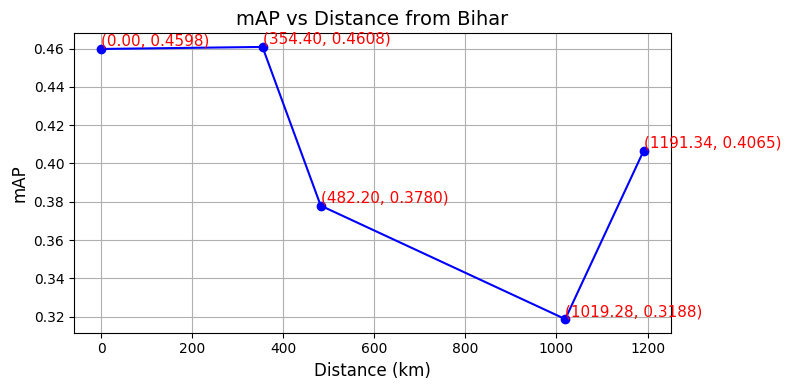

In [6]:
# Plot the hypothesis curve
plt.figure(figsize=(8, 4))
plt.plot(result_sorted['Distance (km)'], result_sorted['mAP'], marker='o', linestyle='-', color='b')

# Annotate each point with distance and mAP value
for i, row in result_sorted.iterrows():
    plt.text(row['Distance (km)'], row['mAP'], f"({row['Distance (km)']:.2f}, {row['mAP']:.4f})", fontsize=11, ha='left', va='bottom', color='red')

plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('mAP', fontsize=12)
plt.title('mAP vs Distance from Bihar', fontsize=14)
plt.grid()
plt.tight_layout();